In [1]:
import BR_ML as brada
import pandas as pd

In [2]:
print(brada.__version__)

0.0.1


In [3]:
pequim = pd.read_csv('datasets/BeijingPM20100101_20151231.csv')
pequim.dropna(inplace=True)

pequim['date'] = pequim['year'].astype(str) + '-' + pequim['month'].astype(str) + '-' + pequim['day'].astype(str)
pequim.drop_duplicates(subset='date', inplace=True)
pequim['date'] = pd.to_datetime(pequim['date'])
pequim.sort_values('date', inplace=True)
pequim.set_index('date', inplace=True)
pequim.index = pd.DatetimeIndex(pequim.index).to_period('D')

pequim.columns

Index(['No', 'year', 'month', 'day', 'hour', 'season', 'PM_Dongsi',
       'PM_Dongsihuan', 'PM_Nongzhanguan', 'PM_US Post', 'DEWP', 'HUMI',
       'PRES', 'TEMP', 'cbwd', 'Iws', 'precipitation', 'Iprec'],
      dtype='object')

In [4]:
black_friday = pd.read_csv('datasets/BlackFriday.csv')
black_friday.columns                           

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [5]:
fb = pd.read_csv('datasets/FB.csv')
fb.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [6]:
fb['Date'] = pd.to_datetime(fb['Date'])
fb = fb.set_index('Date')

In [7]:
from sklearn.datasets import load_iris

In [8]:
iris = load_iris(as_frame=True).frame

In [19]:
iris = iris[iris['target'] != 2]

In [20]:
iris.target.unique()

array([0, 1])

In [21]:
X_train, y_train, X_test, y_test = brada.train_test_split.separacao_dados_treino_teste(df=iris,
                                                    sep_type='classification',
                                                    target_col='target',
#                                                     features_cols=['TEMP'],
#                                                     cat_cont_var_bins=5,
                                                    test_size=0.2,
                                                    random_state=10,)

In [22]:
df_best_model = brada.automl(X_train,
                             y_train['target'].values,
                             training_type='classification',
                             info_model_matrix=[['logisticregression', dict(), 1],
                                                ['svc', dict(), 1],
                                               ],
                             n_splits=2,
                             validation_size=0.1,
                             random_state=10)

Validação dos parâmetros informados...
Validação concluída com sucesso!


Modelo em execução: logisticregression
Modelo em execução: svc


Tempo total de execução: 0.07 minutos.


In [23]:
df_best_model

,name_models,best_roc_auc_score,model
0,logisticregression,1.0,BayesSearchCV(cv=StratifiedShuffleSplit(n_spli...
1,svc,1.0,BayesSearchCV(cv=StratifiedShuffleSplit(n_spli...


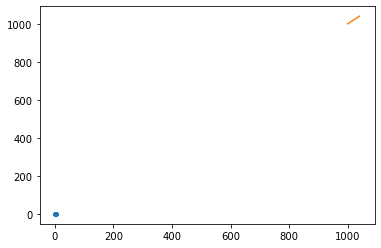

In [13]:
import matplotlib.pyplot as plt
plt.plot(df_best_model.iloc[0,2].predict(X_train), y_train, '.')
plt.plot([1000, 1040], [1000, 1040], '-')

In [14]:
plt.plot(best_model[0].predict(X_test), y_test, '.')
plt.plot([1000, 1040], [1000, 1040], '-')

NameError: name 'best_model' is not defined

In [ ]:
import numpy as np
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = np.arange(0, 3)
q_values = np.arange(0, 3)

In [ ]:
d_values

In [ ]:
kwargs_sarimax=dict()
kwargs_sarimax['p'] = [1,2]
kwargs_sarimax['d'] = [0]
kwargs_sarimax['q'] = [0]
kwargs_sarimax['P'] = [0]
kwargs_sarimax['D'] = [0]
kwargs_sarimax['Q'] = [0]
kwargs_sarimax['s'] = [0]
kwargs_sarimax['trend'] = ['n']

est = brada.automl(X_train,
                   y_train,
                   training_type='time_series',
                   validation_size=0.1,
                   info_model_matrix=[['sarimax', kwargs_sarimax, 5]],
                   random_state=10,)

In [ ]:
from BR_ML.automl.custom_models.sarimax import Sarimax

In [ ]:
reg = Sarimax(p=1,
    d=1,
    q=1,
    P=0,
    D=0,
    Q=0,
    s=0,
    trend='n')

In [ ]:
reg.fit(X_train, y_train)

In [ ]:
reg.predict(X_train).plot()
y_train.plot()


In [ ]:
import numpy as np
from sklearn.base import BaseEstimator
from sklearn.base import RegressorMixin
from statsmodels.tsa.statespace.sarimax import SARIMAX


class Sarimax(BaseEstimator, RegressorMixin):

    """
    Classe que permite deixar o método statmodels SARIMAX no formato de um
    estimador sklearn.
    """

    def __init__(self, p=1, d=0, q=0, P=0, D=0, Q=0, s=0, trend=None,
                 me=False, tvr=False, mle_r=True, sd=False,
                 es=True, ei=True,
                 hr=False, cs=False,
                 to=1, ued=False,
                 dates=None, freq=None, missing='none', kwargs={}):

        """
        Inicialização da classe.
        """

        self.p = p
        self.d = d
        self.q = q
        self.P = P
        self.D = D
        self.Q = Q
        self.s = s
        self.trend = trend
        self.me = me
        self.tvr = tvr
        self.mle_r = mle_r
        self.sd = sd
        self.es = es
        self.ei = ei
        self.hr = hr
        self.cs = cs
        self.to = to
        self.ued = ued
        self.dates = dates
        self.freq = freq
        self.missing = missing
        self.kwargs = kwargs

    def fit(self, X, y):
        """
        Construção do modelo SARIMAX para um conjunto de treino (X, y).
        Idealmente os índices devem estar no formato datetime. Por exmplo,
        df.index = pd.DatetimeIndex(df.index).to_period(period).

        Args:
            X (pandas DataFrame): DataFrame contendo as exógenas.
            y (pandas Series): Series contendo a endógena.

        """

        order = (self.p, self.d, self.q)
        seasonal_order = (self.P, self.D, self.Q, self.s)

        print(order)
        print(seasonal_order)
        print(self.trend)
        print(self.me)
        print(self.tvr)

        self.sarimax_model = SARIMAX(endog=y, exog=X, order=order,
                                      seasonal_order=seasonal_order,
                                      trend=self.trend,
                                      measurement_error=self.me,
                                      time_varying_regression=self.tvr,
                                      mle_regression=self.mle_r,
                                      simple_differencing=self.sd,
                                      enforce_stationarity=self.es,
                                      enforce_invertibility=self.ei,
                                      hamilton_representation=self.hr,
                                      concentrate_scale=self.cs,
                                      trend_offset=self.to,
                                      use_exact_diffuse=self.ued,
                                      dates=self.dates,
                                      freq=self.freq,
                                      missing=self.missing,
                                      kwargs=self.kwargs
                                      )
        self.sarimax_model_fit = self.sarimax_model.fit(disp=0)

        return self

    def predict(self, X):
        """
        Previsão de regressão SARIMAX do target para a exógena X.

        Args:
            X (pandas DataFrame): DataFrame contendo as exógenas.

        Return:
            Previsão SARIMAX para a exógena de entrada X.

        """

        y_pred = self.sarimax_model_fit.forecast(steps=len(X),
                                                 exog=X,
                                                 index=X.index)
        self.y_pred = y_pred
        y_pred = self._forecast_handling()

        return y_pred

    def _forecast_handling(self):
        """
        Tratamento de previsões infinitos pelo SARIMAX. Esse valores são
        substituídos por np.nan e logo em seguida é feita uma
        interpolação linear para substituir os valores np.nan.

        Return:
            Retorna a previsão do SARIMAX tratada.

        """

        y_pred_processed = self.y_pred
        y_pred_processed.loc[y_pred_processed.isin([np.inf, -np.inf])] = np.nan
        y_pred_processed = y_pred_processed.interpolate(method='linear')

        return y_pred_processed


In [ ]:
from skopt import BayesSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

from sklearn.model_selection import TimeSeriesSplit

max_train_size = int(X_train.shape[0] * (1 - 0.2))
cv = TimeSeriesSplit(n_splits=2,
                     max_train_size=max_train_size
                    )


estimator = Sarimax()

from sklearn.metrics import mean_squared_error
scorer = make_scorer(mean_squared_error, greater_is_better=False)

kwargs_sarimax=dict()
kwargs_sarimax["p"] = [1,2,3]
kwargs_sarimax["d"] = [0,1,2]
kwargs_sarimax["q"] = [0,1,2]
kwargs_sarimax["P"] = [0]
kwargs_sarimax["D"] = [0]
kwargs_sarimax["Q"] = [0]
kwargs_sarimax["s"] = [0]
kwargs_sarimax['trend'] = [None, 'n']


bayes_search = BayesSearchCV(estimator=estimator,
                                     search_spaces=kwargs_sarimax,
#                                      n_jobs=-1,
                                     n_iter=10,
                                     scoring=scorer,
                                     verbose=1,
                                     cv=cv,
                                     random_state=10,
                                     refit=True,
                                     )

bayes_search.fit(X=X_train, y=y_train)


In [ ]:
bayes_search.best_params_

In [ ]:
bayes_search.predict(X_train).plot()

In [ ]:
y_train.plot()

In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold, StratifiedShuffleSplit, ShuffleSplit

In [ ]:
KFold(), StratifiedKFold(), StratifiedShuffleSplit(), ShuffleSplit()

In [ ]:
from sklearn.metrics import r2_score


In [ ]:
r2_score()